In [1]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import  train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
print("done")

done


In [2]:
gvm_data = pd.read_csv("datasets/gbm-data.csv")
X = gvm_data.iloc[:, 1:]
y = gvm_data.Activity
gvm_data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, X_test, y_train, y_test =  train_test_split(X.to_numpy(), y.to_numpy(),
                                      test_size=0.8,
                                      random_state=241)

In [5]:
loss_train = {}
loss_test = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    estimator = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    estimator.fit(X_train, y_train)
    proba_gen = estimator.staged_predict_proba(X_train)
    pos_prob = [i[:, 1] for i in proba_gen] # get probs of positive class
    loss_train[f"Learning rate = {lr}"] = [log_loss(y_train, probs) for probs in pos_prob]
print("Got it")

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.71s
         2           0.9192           11.17s
         3           0.8272           10.88s
         4           0.7834           10.46s
         5           0.7109           10.15s
         6           0.6368           10.14s
         7           0.5797           10.15s
         8           0.5610           10.02s
         9           0.5185            9.89s
        10           0.4984            9.75s
        20           0.1999            9.36s
        30           0.1313            9.20s
        40           0.0790            9.02s
        50           0.0511            8.78s
        60           0.0352            8.26s
        70           0.0245            7.72s
        80           0.0162            7.21s
        90           0.0114            6.88s
       100           0.0077            6.39s
       200           0.0002            2.06s
      Iter       Train Loss   Remaining Time 
        

In [7]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    estimator = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    estimator.fit(X_train, y_train)
    proba_gen = estimator.staged_predict_proba(X_test)
    pos_prob = [i[:, 1] for i in proba_gen] # get probs of positive class
    loss_test[f"Learning rate = {lr}"] = [log_loss(y_test, probs) for probs in pos_prob]
print("Got it")

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.71s
         2           0.9192           11.73s
         3           0.8272           11.50s
         4           0.7834           11.05s
         5           0.7109           10.72s
         6           0.6368           10.36s
         7           0.5797           10.27s
         8           0.5610           10.46s
         9           0.5185           10.68s
        10           0.4984           10.68s
        20           0.1999           10.12s
        30           0.1313            9.92s
        40           0.0790            9.26s
        50           0.0511            8.91s
        60           0.0352            8.33s
        70           0.0245            7.94s
        80           0.0162            7.53s
        90           0.0114            7.02s
       100           0.0077            6.52s
       200           0.0002            2.16s
      Iter       Train Loss   Remaining Time 
        

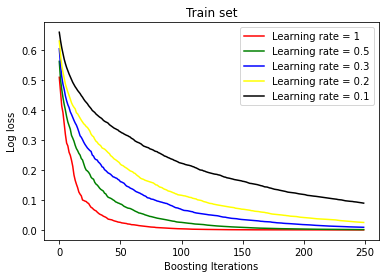

In [17]:
plt.figure()
colors = {0 : "red", 1 : "green", 2 : "blue",3 : "yellow",4 : "black"}
for i, (item, value) in enumerate(loss_train.items()):
    plt.plot(value, c=colors[i], label=item)
plt.title("Train set")
plt.legend( loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Log loss')
plt.show()

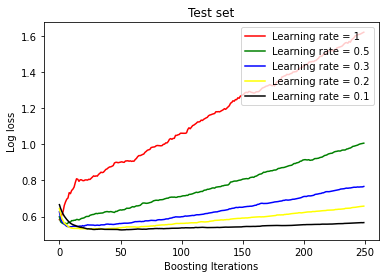

In [18]:
plt.figure()
colors = {0 : "red", 1 : "green", 2 : "blue",3 : "yellow",4 : "black"}
for i, (item, value) in enumerate(loss_test.items()):
    plt.plot(value, c=colors[i], label=item)
plt.title("Test set")
plt.legend( loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Log loss')
plt.show()

In [10]:
min_ = 1000000
index = 0
for i, ll in enumerate(loss_test['Learning rate = 0.2']):
    if ll < min_:
        min_ = ll
        index = i
print(min_, index + 1)

0.5301645204906471 36


In [15]:
estimator = GradientBoostingClassifier(n_estimators=37, verbose=True, random_state=241)
estimator.fit(X_train, y_train)
pos_prob = estimator.predict_proba(X_test)[: , 1]
ll = log_loss(y_test, pos_prob)
print(round(ll,2))

      Iter       Train Loss   Remaining Time 
         1           1.3199            1.44s
         2           1.2645            1.40s
         3           1.2170            1.35s
         4           1.1775            1.30s
         5           1.1404            1.27s
         6           1.1106            1.24s
         7           1.0844            1.20s
         8           1.0617            1.16s
         9           1.0411            1.12s
        10           1.0223            1.08s
        20           0.8864            0.70s
        30           0.7844            0.29s
0.53
